In [1]:
import mne
from mne.io import read_raw_brainvision
from TFG_utils import (returnFolders, returnFiles, take_vmrk_files, take_vhdr_files, take_eeg_files, plot_eeg_time, plot_PSD, plot_freq_response, get_potencias, ratios)
from TFG_utils import Get_Start_End, Get_spot_start_samples, check_index_between
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
# COLLECTING DATA
foldername = 'EEG_folders'

EEG_folders=returnFolders(foldername)
EEG_files=returnFiles(EEG_folders)

vmrk_files=take_vmrk_files(EEG_files)
vhdr_files=take_vhdr_files(EEG_files)

i=0 # 1st EEG example

In [3]:
verbose=False
raw = read_raw_brainvision(vhdr_files[i],verbose=verbose).load_data(verbose=verbose)
sampling_freq = int(raw.info['sfreq'])

# SEPARATE SPOTS

In [4]:
picks=[2,3,28,29] # Channels of interest [F3, F7, F4, F8]
ch_names=['F3', 'F7', 'F4', 'F8']
info_ch=mne.create_info(ch_names, sampling_freq, ch_types='eeg', verbose=verbose) # use raw.set_montage('standard_1020')
data,times=raw[:]

spots_times_sec = [0, 60, 120, 180, 226, 287, 347] # Time (sec) at which each spot begins
start_end=Get_Start_End(vmrk_files[i]) # markers of the spots: start and end
spots_time=Get_spot_start_samples(start_end,sampling_freq, spots_times_sec)

In [5]:
ba=[]
sp1=[]
sp2=[]
sp3=[]
sp4=[]
sp5=[]
sp6=[]
sp7=[]

for ch in picks:
    ba.append(data[ch,:spots_time[0]]) # Basal activity
    sp1.append(data[ch,spots_time[0]:spots_time[1]]) #1st spot
    sp2.append(data[ch,spots_time[1]:spots_time[2]]) #2nd spot
    sp3.append(data[ch,spots_time[2]:spots_time[3]]) #3rd spot
    sp4.append(data[ch,spots_time[3]:spots_time[4]]) #4th spot
    sp5.append(data[ch,spots_time[4]:spots_time[5]]) #5th spot
    sp6.append(data[ch,spots_time[5]:spots_time[6]]) #6th spot
    sp7.append(data[ch,spots_time[6]:]) #7th spot

ba  = mne.io.RawArray(ba, info_ch,verbose=verbose)
sp1 = mne.io.RawArray(sp1, info_ch,verbose=verbose)
sp2 = mne.io.RawArray(sp2, info_ch,verbose=verbose)
sp3 = mne.io.RawArray(sp3, info_ch,verbose=verbose)
sp4 = mne.io.RawArray(sp4, info_ch,verbose=verbose)
sp5 = mne.io.RawArray(sp5, info_ch,verbose=verbose)
sp6 = mne.io.RawArray(sp6, info_ch,verbose=verbose)
sp7 = mne.io.RawArray(sp7, info_ch,verbose=verbose)

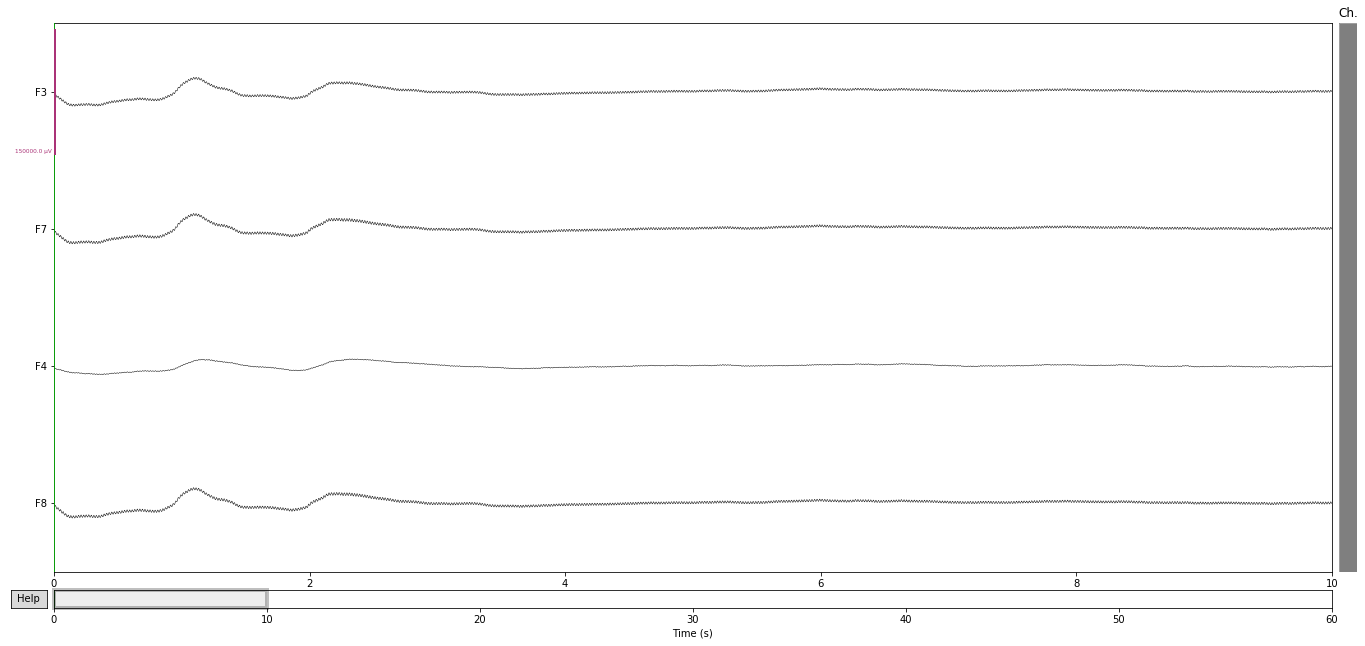

In [6]:
sp3.plot(scalings={"eeg": 75e-3})
plt.show()

# FRECUENCY BANDS

### POTENCIAS TOTALES

#### POR ANUNCIO

In [7]:
P_ba=[]
P_sp1=[]
P_sp2=[]
P_sp3=[]
P_sp4=[]
P_sp5=[]
P_sp6=[]
P_sp7=[]

f1,f2 = (0.5,40)
spots=[ba,sp1,sp2,sp3,sp4,sp5,sp6,sp7]

for ch in range(len(picks)):
    f, Px = signal.periodogram(ba.get_data()[ch], sampling_freq) 
    idx=check_index_between(f,f1,f2)
    P_ba.append(sum(Px[idx]))

    f, Px = signal.periodogram(sp1.get_data()[ch], sampling_freq) 
    idx=check_index_between(f,f1,f2)
    P_sp1.append(sum(Px[idx]))

    f, Px = signal.periodogram(sp2.get_data()[ch], sampling_freq) 
    idx=check_index_between(f,f1,f2)
    P_sp2.append(sum(Px[idx]))

    f, Px = signal.periodogram(sp3.get_data()[ch], sampling_freq) 
    idx=check_index_between(f,f1,f2)
    P_sp3.append(sum(Px[idx]))

    f, Px = signal.periodogram(sp4.get_data()[ch], sampling_freq) 
    idx=check_index_between(f,f1,f2)
    P_sp4.append(sum(Px[idx]))

    f, Px = signal.periodogram(sp5.get_data()[ch], sampling_freq) 
    idx=check_index_between(f,f1,f2)
    P_sp5.append(sum(Px[idx]))

    f, Px = signal.periodogram(sp6.get_data()[ch], sampling_freq) 
    idx=check_index_between(f,f1,f2)
    P_sp6.append(sum(Px[idx]))

    f, Px = signal.periodogram(sp7.get_data()[ch], sampling_freq) 
    idx=check_index_between(f,f1,f2)
    P_sp7.append(sum(Px[idx]))

In [8]:
print('Potencia total del periodo de actividad basal previa a los anuncios:',round(sum(P_ba),5))
print('Potencia total del anuncio 1:',round(sum(P_sp1),5))
print('Potencia total del anuncio 2:',round(sum(P_sp2),5))
print('Potencia total del anuncio 3:',round(sum(P_sp3),5))
print('Potencia total del anuncio 4:',round(sum(P_sp4),5))
print('Potencia total del anuncio 5:',round(sum(P_sp5),5))
print('Potencia total del anuncio 6:',round(sum(P_sp6),5))
print('Potencia total del anuncio 7:',round(sum(P_sp7),5))
print('')

Potencia total del periodo de actividad basal previa a los anuncios: 0.0006
Potencia total del anuncio 1: 0.00462
Potencia total del anuncio 2: 0.00704
Potencia total del anuncio 3: 0.01713
Potencia total del anuncio 4: 0.00191
Potencia total del anuncio 5: 0.00901
Potencia total del anuncio 6: 0.00044
Potencia total del anuncio 7: 0.00185



#### POR CANAL (F3,F7,F4,F8)

In [9]:
f1,f2 = (0.5,40)

P_ch_F3=[]
P_ch_F7=[]
P_ch_F4=[]
P_ch_F8=[]

#spots_titles=['ba','sp1','sp2','sp3','sp4','sp5','sp6','sp7']
spots=[ba,sp1,sp2,sp3,sp4,sp5,sp6,sp7]

for s in range(len(spots)):
#for s in range(len(spots_titles)):
    f, Px = signal.periodogram(spots[s].get_data()[0], sampling_freq) 
    idx = []
    for i in f:
        if i>f1 and i<=f2:
            idx.append(True)
        else:
            idx.append(False)
    P_ch_F3.append(sum(Px[idx]))
    
    f, Px = signal.periodogram(spots[s].get_data()[1], sampling_freq) 
    idx = []
    for i in f:
        if i>f1 and i<=f2:
            idx.append(True)
        else:
            idx.append(False)
    P_ch_F7.append(sum(Px[idx]))
   
    f, Px = signal.periodogram(spots[s].get_data()[2], sampling_freq) 
    idx = []
    for i in f:
        if i>f1 and i<=f2:
            idx.append(True)
        else:
            idx.append(False)
    P_ch_F4.append(sum(Px[idx]))
    
    f, Px = signal.periodogram(spots[s].get_data()[3], sampling_freq) 
    idx = []
    for i in f:
        if i>f1 and i<=f2:
            idx.append(True)
        else:
            idx.append(False)
    P_ch_F8.append(sum(Px[idx]))

In [10]:
print('Potencia total del canal F3:',round(sum(P_ch_F3),5))
print('Potencia total del canal F7:',round(sum(P_ch_F7),5))
print('Potencia total del canal F4:',round(sum(P_ch_F4),5))
print('Potencia total del canal F8:',round(sum(P_ch_F8),5))

print('')
P_F3=[round(P_ba[0],5),round(P_sp1[0],5),round(P_sp2[0],5),round(P_sp3[0],5),round(P_sp4[0],5),round(P_sp5[0],5),round(P_sp6[0],5),round(P_sp7[0],5)]
P_F7=[round(P_ba[1],5),round(P_sp1[1],5),round(P_sp2[1],5),round(P_sp3[1],5),round(P_sp4[1],5),round(P_sp5[1],5),round(P_sp6[1],5),round(P_sp7[1],5)]
P_F4=[round(P_ba[2],5),round(P_sp1[2],5),round(P_sp2[2],5),round(P_sp3[2],5),round(P_sp4[2],5),round(P_sp5[2],5),round(P_sp6[2],5),round(P_sp7[2],5)]
P_F8=[round(P_ba[3],5),round(P_sp1[3],5),round(P_sp2[3],5),round(P_sp3[3],5),round(P_sp4[3],5),round(P_sp5[3],5),round(P_sp6[3],5),round(P_sp7[3],5)]
print('Potencias canal F3 por anuncio:', P_F3)
print('Potencias canal F7 por anuncio:', P_F7)
print('Potencias canal F4 por anuncio:', P_F4)
print('Potencias canal F8 por anuncio:', P_F8)

Potencia total del canal F3: 0.02188
Potencia total del canal F7: 0.00806
Potencia total del canal F4: 0.00452
Potencia total del canal F8: 0.00813

Potencias canal F3 por anuncio: [0.00015, 0.00128, 0.00187, 0.01535, 0.00049, 0.00211, 0.00014, 0.0005]
Potencias canal F7 por anuncio: [0.0002, 0.00144, 0.00201, 0.00065, 0.00055, 0.00259, 0.00011, 0.00051]
Potencias canal F4 por anuncio: [5e-05, 0.00045, 0.00111, 0.0005, 0.00033, 0.00168, 8e-05, 0.00032]
Potencias canal F8 por anuncio: [0.0002, 0.00145, 0.00205, 0.00064, 0.00055, 0.00262, 0.00011, 0.00052]


##### POTENCIA EN LAS BANDAS DE FRECUENCIA

In [11]:
pot_alpha_F3=get_potencias(0,ba,sampling_freq)
pot_alpha_F7=get_potencias(1,ba,sampling_freq)
pot_alpha_F4=get_potencias(2,ba,sampling_freq)
pot_alpha_F8=get_potencias(3,ba,sampling_freq)